# Assignment \#3 Solution Guide

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [2]:
# basic data exploration
train = pd.read_csv("/home/vagrant/dataset/hw3/train.csv")
test = pd.read_csv("/home/vagrant/dataset/hw3/train.csv")

In [3]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [4]:
features = train.columns[2:]
labels = ["safe","accident"]
features

Index([u'ps_ind_01', u'ps_ind_02_cat', u'ps_ind_03', u'ps_ind_04_cat',
       u'ps_ind_05_cat', u'ps_ind_06_bin', u'ps_ind_07_bin', u'ps_ind_08_bin',
       u'ps_ind_09_bin', u'ps_ind_10_bin', u'ps_ind_11_bin', u'ps_ind_12_bin',
       u'ps_ind_13_bin', u'ps_ind_14', u'ps_ind_15', u'ps_ind_16_bin',
       u'ps_ind_17_bin', u'ps_ind_18_bin', u'ps_reg_01', u'ps_reg_02',
       u'ps_reg_03', u'ps_car_01_cat', u'ps_car_02_cat', u'ps_car_03_cat',
       u'ps_car_04_cat', u'ps_car_05_cat', u'ps_car_06_cat', u'ps_car_07_cat',
       u'ps_car_08_cat', u'ps_car_09_cat', u'ps_car_10_cat', u'ps_car_11_cat',
       u'ps_car_11', u'ps_car_12', u'ps_car_13', u'ps_car_14', u'ps_car_15',
       u'ps_calc_01', u'ps_calc_02', u'ps_calc_03', u'ps_calc_04',
       u'ps_calc_05', u'ps_calc_06', u'ps_calc_07', u'ps_calc_08',
       u'ps_calc_09', u'ps_calc_10', u'ps_calc_11', u'ps_calc_12',
       u'ps_calc_13', u'ps_calc_14', u'ps_calc_15_bin', u'ps_calc_16_bin',
       u'ps_calc_17_bin', u'ps_calc_18_bin'

In [20]:
X = train[features]
y = train.target
n = len(y)

In [6]:
X.shape

(595212, 57)

In [7]:
y.shape

(595212,)

In [8]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [12]:
pca = PCA(n_components=3)
pca.fit(X)
X_r = pca.transform(X)

print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

explained variance ratio (first two components): [ 0.9077327   0.02542341  0.01103373]


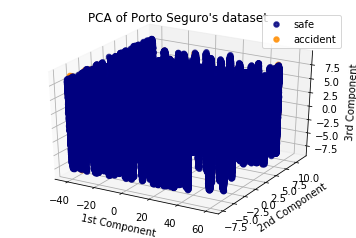

In [17]:
fig = plt.figure()
colors = ['navy', 'darkorange']
lw = 2

ax = fig.add_subplot(111, projection='3d')

for color, i, label in zip(colors, [0, 1], labels):
    ax.scatter(X_r[y == i, 0], X_r[y == i, 1], X_r[y == i, 2],
               color=color, alpha=.8, lw=lw, label=label)
    
ax.set_xlabel('1st Component')
ax.set_ylabel('2nd Component')
ax.set_zlabel('3rd Component')


ax.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of Porto Seguro\'s dataset')

plt.show()

In [18]:
from sklearn.ensemble import RandomForestClassifier as RFC

In [21]:
rfc = RFC(n_estimators=100)
rfc.fit(X,y)

y_hat = rfc.predict(X)

NameError: name 'n_data' is not defined

In [22]:
float(np.sum(np.equal(y, y_hat)))/n

0.9999361572011317

In [33]:
# Features sorted by importance according to random forest classifier
f = zip(rfc.feature_importances_, features)
f.sort(reverse=True)
f

[(0.058739535561928589, 'ps_car_13'),
 (0.052025405609146536, 'ps_reg_03'),
 (0.03986936352410865, 'ps_car_14'),
 (0.037316500363522277, 'ps_calc_10'),
 (0.037183531562810866, 'ps_calc_14'),
 (0.035072648923163502, 'ps_calc_11'),
 (0.031998200804827424, 'ps_ind_15'),
 (0.0318547139908366, 'ps_car_11_cat'),
 (0.031568500226905098, 'ps_ind_03'),
 (0.031399119187229291, 'ps_calc_01'),
 (0.031263801041203743, 'ps_calc_03'),
 (0.031106510558746317, 'ps_calc_02'),
 (0.029729894076030799, 'ps_reg_02'),
 (0.029698023143445273, 'ps_calc_13'),
 (0.028337190436287674, 'ps_calc_08'),
 (0.02815118447058201, 'ps_calc_07'),
 (0.0264331108678043, 'ps_calc_06'),
 (0.025694427855250602, 'ps_calc_09'),
 (0.025690497341590537, 'ps_car_15'),
 (0.024277801217709678, 'ps_calc_05'),
 (0.024076924450023449, 'ps_calc_04'),
 (0.023744990262897177, 'ps_car_06_cat'),
 (0.02369215496270969, 'ps_ind_01'),
 (0.023424098536745729, 'ps_reg_01'),
 (0.023226234764712334, 'ps_calc_12'),
 (0.021978861867595761, 'ps_car_12'

In [34]:
from sklearn.svm import SVC

In [ ]:
clf = SVC()
clf.fit(X,y)